In [20]:
import requests

In [21]:
# Learning the basics of request & response in https://www.naver.com/

naver_url = 'https://www.naver.com/'
naver_response = requests.get(naver_url)

'\n<!doctype html>                <html lang="ko" data-dark="false"> <head> <meta charset="utf-8"> <title>NAVER</title> <meta http-equiv="X-UA-Compatible" content="IE=edge"> <meta name="viewport" content="width=1190"> <meta name="apple-mobile-web-app-title" content="NAVER"/> <meta name="robots" content="index,nofollow"/> <meta name="description" content="네이버 메인에서 다양한 정보와 유용한 컨텐츠를 만나 보세요"/> <meta property="og:title" content="네이버"> <meta property="og:url" content="https://www.naver.com/"> <meta property="og:image" content="https://s.pstatic.net/static/www/mobile/edit/2016/0705/mobile_212852414260.png"> <meta property="og:description" content="네이버 메인에서 다양한 정보와 유용한 컨텐츠를 만나 보세요"/> <meta name="twitter:card" content="summary"> <meta name="twitter:title" content=""> <meta name="twitter:url" content="https://www.naver.com/"> <meta name="twitter:image" content="https://s.pstatic.net/static/www/mobile/edit/2016/0705/mobile_212852414260.png"> <meta name="twitter:description" content="네이버 메인에서 다양한 
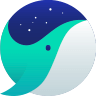
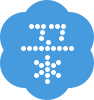

In [22]:
naver_response.text

In [40]:
# Using the module 'BeautifulSoup' to find the desired data or information from the website

import bs4

naver_bs = bs4.BeautifulSoup(naver_response.text, 'lxml')

In [44]:
# Using 'find' to return a data that is under 'span' tag and 'keyword' class
# Keep in mind that 'find' function returns the first data!
result = naver_bs.find('span', class_='keyword')
#result.text

# 'find_all' function returns a list that stores all the data
result_list = naver_bs.find_all('span', class_='keyword')

for span in result_list:
    print(span.text) 

Here, result.text and span.text should both return strings, but it is returning "None". I currently don't know the error; however, it will be fixed ASAP.

In [63]:
import pandas as pd

# From http://comp.fnguide.com/SVO2/asp/SVD_main.asp

fs_url = 'https://comp.fnguide.com/SVO2/asp/SVD_Finance.asp?pGB=1&gicode=A005930&cID=&MenuYn=Y&ReportGB=D&NewMenuID=103&stkGb=701' #Samsung Electronics
fs_page = requests.get(fs_url)
fs_tables = pd.read_html(fs_page.text) # automatically stores in dataframe

# for this case, there are 6 df in fs_tables: Comprehensive Income Statement (yearly, quarter)
#                                             Financial Statement (yearly, quarter)
#                                             Cash flow statement (yearly, quarter)

In [64]:
fs_tables[0] # returns Comprehensive Income Statement (yearly)

,IFRS(연결),2017/12,2018/12,2019/12,2020/06,전년동기,전년동기(%)
0,매출액,2395754.0,2437714.0,2304009.0,1082913.0,1085127.0,-0.2
1,매출원가,1292907.0,1323944.0,1472395.0,667129.0,686911.0,-2.9
2,매출총이익,1102847.0,1113770.0,831613.0,415784.0,398215.0,4.4
3,판매비와관리비계산에 참여한 계정 펼치기,566397.0,524903.0,553928.0,269848.0,269912.0,-0.0
4,영업이익,536450.0,588867.0,277685.0,145936.0,128303.0,13.7
5,영업이익(발표기준),536450.0,588867.0,277685.0,145936.0,128303.0,13.7
6,금융수익계산에 참여한 계정 펼치기,97374.0,99993.0,101616.0,55610.0,50681.0,9.7
7,금융원가계산에 참여한 계정 펼치기,89789.0,86089.0,82749.0,49558.0,40602.0,22.1
8,기타수익계산에 참여한 계정 펼치기,30107.0,14850.0,17787.0,6058.0,6819.0,-11.2
9,기타비용계산에 참여한 계정 펼치기,14196.0,11420.0,14147.0,14249.0,5700.0,150.0


Comprehensive Income Statement (Yearly)
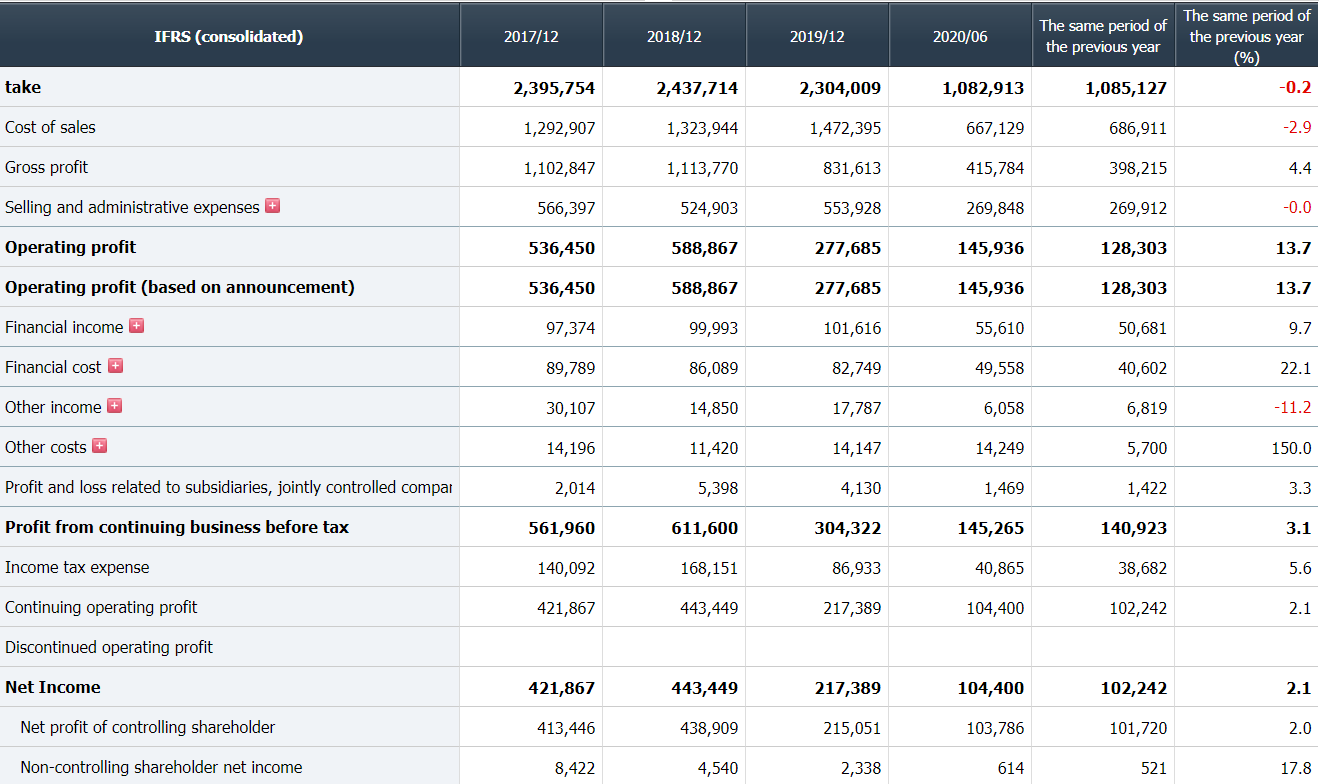

In [65]:
# For the simplicity and the efficiency, change the dataframe and store it in temp_df
temp_df = fs_tables[0]
temp_df =  temp_df.set_index('IFRS(연결)') # 'IFRS(consolidated)'
temp_df = temp_df[['2017/12', '2018/12', '2019/12', '2020/06']]
temp_df = temp_df.loc[['매출액', '영업이익', '당기순이익']] # 'Take', 'Operating Profit', 'Net Income'
temp_df

,2017/12,2018/12,2019/12,2020/06
IFRS(연결),,,,
매출액,2395754.0,2437714.0,2304009.0,1082913.0
영업이익,536450.0,588867.0,277685.0,145936.0
당기순이익,421867.0,443449.0,217389.0,104400.0


In [66]:
# Same thing for Financial Statement (yearly)
temp_df2 = fs_tables[2]
temp_df2 = temp_df2.set_index('IFRS(연결)') # 'IFRS(consolidated)'
temp_df2 = temp_df2.loc[['자산', '부채', '자본']] # 'Assets', 'Fan', 'Capital'
temp_df2

,2017/12,2018/12,2019/12,2020/06
IFRS(연결),,,,
자산,3017521.0,3393572.0,3525645.0,3579595.0
부채,872607.0,916041.0,896841.0,881517.0
자본,2144914.0,2477532.0,2628804.0,2698078.0


Financial Statement (Yearly)
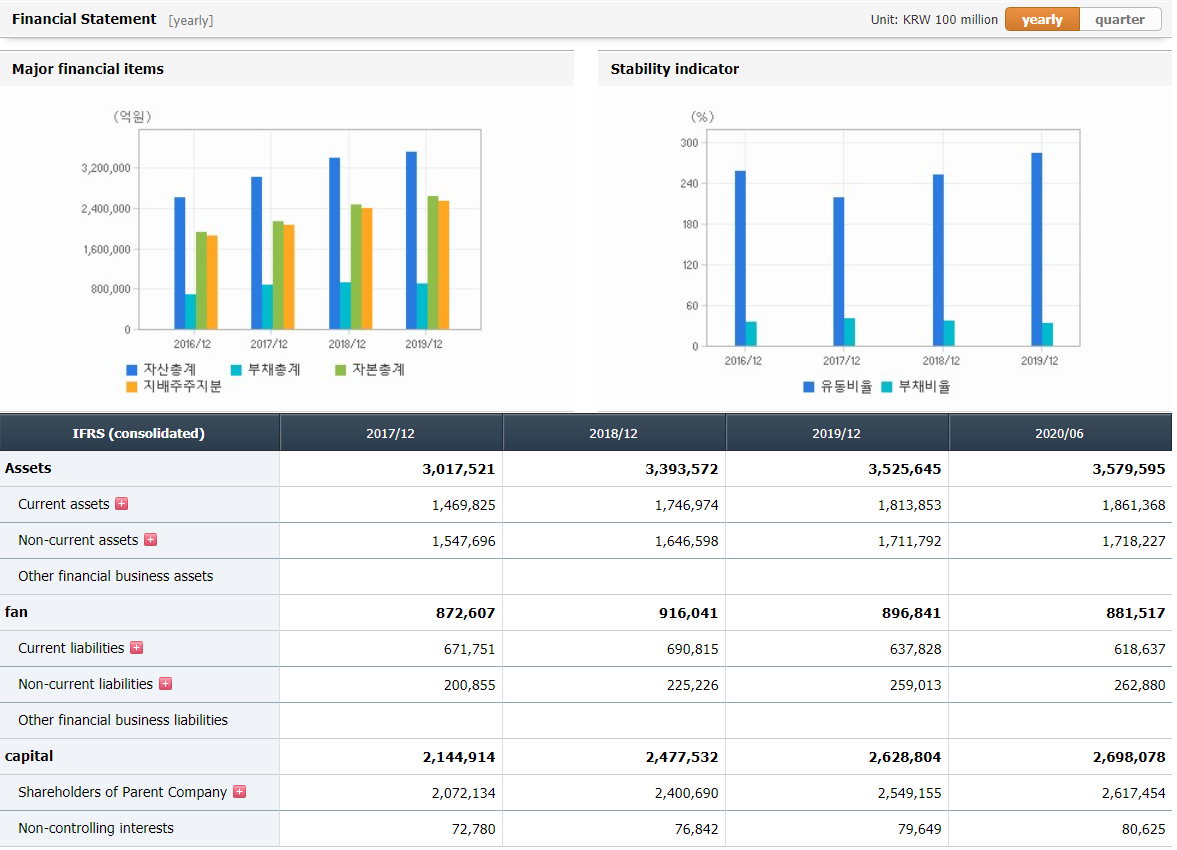

In [67]:
# Likewise, for Cash Flow Statement (Yearly)
temp_df3 = fs_tables[4]
temp_df3 = temp_df3.set_index('IFRS(연결)') # 'IFRS(consolidated)'
temp_df3 = temp_df3.loc[['영업활동으로인한현금흐름']] # 'Cash Flow from Business Activities'
temp_df3

,2017/12,2018/12,2019/12,2020/06
IFRS(연결),,,,
영업활동으로인한현금흐름,621620.0,670319.0,453829.0,266280.0


Cash Flow Statement (Yearly)
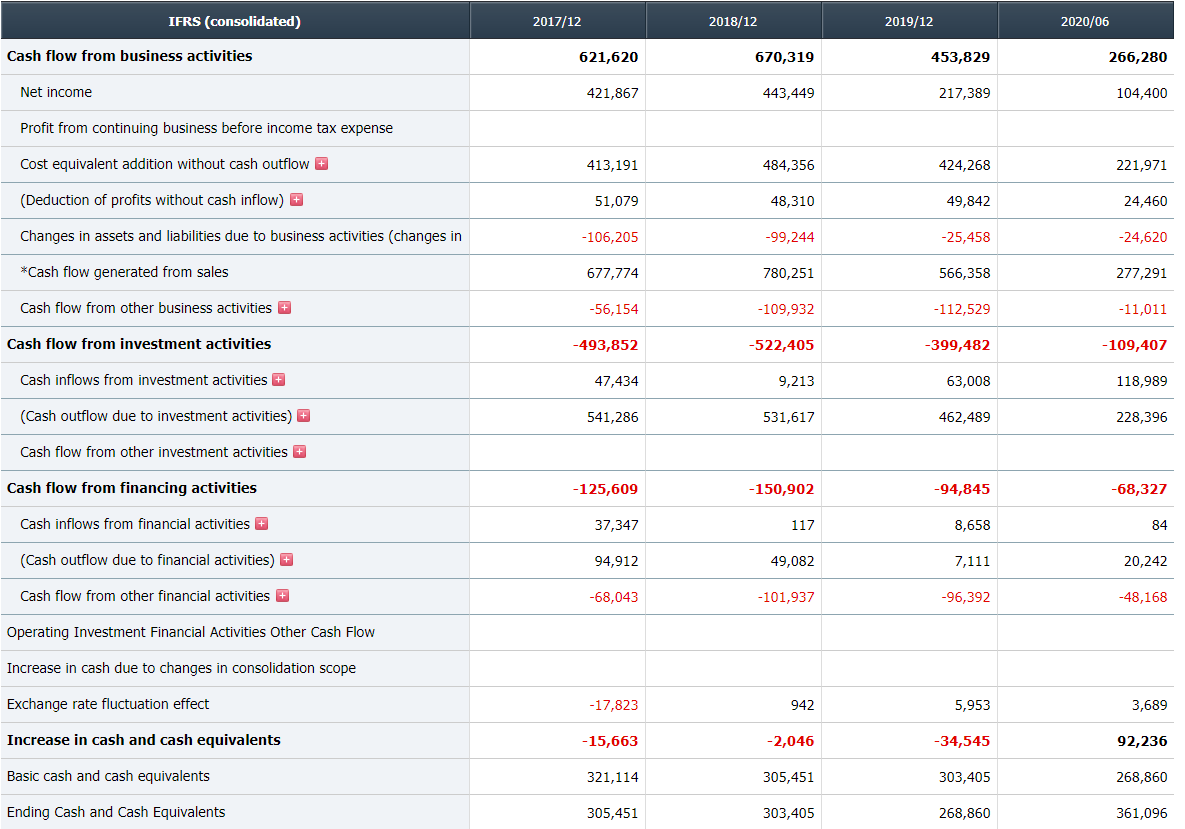

In [69]:
# Now, concatenate all three

fs_df = pd.concat([temp_df, temp_df2, temp_df3])
fs_df

,2017/12,2018/12,2019/12,2020/06
IFRS(연결),,,,
매출액,2395754.0,2437714.0,2304009.0,1082913.0
영업이익,536450.0,588867.0,277685.0,145936.0
당기순이익,421867.0,443449.0,217389.0,104400.0
자산,3017521.0,3393572.0,3525645.0,3579595.0
부채,872607.0,916041.0,896841.0,881517.0
자본,2144914.0,2477532.0,2628804.0,2698078.0
영업활동으로인한현금흐름,621620.0,670319.0,453829.0,266280.0


In [70]:
# function for making fs_df given the firm code
# Note that previously for Samsung Electronics, the firm code was A005930
def make_fs_dataframe(firm_code):
    fs_url = 'https://comp.fnguide.com/SVO2/asp/SVD_Finance.asp?pGB=1&cID=&MenuYn=Y&ReportGB=D&NewMenuID=103&stkGb=701&gicode=' + firm_code
    fs_page = requests.get(fs_url)
    fs_tables = pd.read_html(fs_page.text)
    
    temp_df = fs_tables[0]
    temp_df = temp_df.set_index(temp_df.columns[0])
    temp_df = temp_df[temp_df.columns[:4]]
    temp_df = temp_df.loc[['매출액', '영업이익', '당기순이익']]

    temp_df2 = fs_tables[2]
    temp_df2 = temp_df2.set_index(temp_df2.columns[0])
    temp_df2 = temp_df2.loc[['자산', '부채', '자본']]

    temp_df3 = fs_tables[4]
    temp_df3 = temp_df3.set_index(temp_df3.columns[0])
    temp_df3 = temp_df3.loc[['영업활동으로인한현금흐름']]

    fs_df = pd.concat([temp_df, temp_df2, temp_df3])
    
    return fs_df

In [72]:
# make fs_df for Hyundai Motor Company (A005380)
hyundai_motor_company = make_fs_dataframe('A005380')
hyundai_motor_company

,2017/12,2018/12,2019/12,2020/06
IFRS(연결),,,,
매출액,963761.0,968126.0,1057464.0,471784.0
영업이익,45747.0,24222.0,36055.0,14541.0
당기순이익,45464.0,16450.0,31856.0,9300.0
자산,1781995.0,1806558.0,1945122.0,2018045.0
부채,1034421.0,1067597.0,1181465.0,1257564.0
자본,747574.0,738960.0,763658.0,760481.0
영업활동으로인한현금흐름,39224.0,37643.0,4198.0,7167.0


In [74]:
# Though it has become much more convenient by using make_fs_dataframe function,
# it is still physically impossible to compare 2000+ fs_df for different firms.
# Hence, I am going to make one big dataframe for easier comparison afterwards. 

In [75]:
# Main idea:
# (1) take '2017/12' column and make a new dataframe
# (2) transpose the dataframe (so that the row becomes the firm code)
# (3) group the entire columns ('Take', 'Operating Profit', 'Net Income', 'Assets', 'Fan', 'Capital', 'Cash Flow from Business Activities')
# as one column called '2017/12'

code = 'A005930' #firm_code for Samsung Electronics
fs_df = make_fs_dataframe(code)
col = fs_df.columns[0]
temp_df = pd.DataFrame({code : fs_df[col]}) # (1)
temp_df = temp_df.T #(2)
temp_df.columns = [[col]*len(fs_df), temp_df.columns] #(3)
temp_df

2017/12                      ...                                  
IFRS(연결)        매출액      영업이익     당기순이익  ...        부채         자본 영업활동으로인한현금흐름
A005930   2395754.0  536450.0  421867.0  ...  872607.0  2144914.0     621620.0

[1 rows x 7 columns]

In [79]:
# Now, this should apply to all the columns
# Hence, use the for loop to continuously merge the temp_df, eventually constructing a total_df at the end

code = 'A005930' # Samsung Electronics
fs_df = make_fs_dataframe(code)

for num, col in enumerate(fs_df.columns):
    temp_df = pd.DataFrame({code : fs_df[col]})
    temp_df = temp_df.T
    temp_df.columns = [[col]*len(fs_df), temp_df.columns]
    if num == 0:
        total_df = temp_df
    else:
        total_df = pd.merge(total_df, temp_df, how='outer', left_index=True, right_index=True)

total_df

2017/12                      ...   2020/06                        
IFRS(연결)        매출액      영업이익     당기순이익  ...        부채         자본 영업활동으로인한현금흐름
A005930   2395754.0  536450.0  421867.0  ...  881517.0  2698078.0     266280.0

[1 rows x 28 columns]

In [80]:
# Now, a generalized function for every firm

def change_df(firm_code, dataframe):
    for num, col in enumerate(dataframe.columns):
        temp_df = pd.DataFrame({firm_code : dataframe[col]})
        temp_df = temp_df.T
        temp_df.columns = [[col]*len(dataframe), temp_df.columns]
        if num == 0: # only for the first column
            total_df = temp_df
        else: # the rest of the column, continuously merging
            total_df = pd.merge(total_df, temp_df, how='outer', left_index=True, right_index=True)    
    
    return total_df

In [82]:
# Final testing...
# Using 'make_fs_dataframe' & 'change_df' functions to make the final total_fs

firmcode_list = ['A005930', 'A005380', 'A035420', 'A003550', 'A034730']

for num, code in enumerate(firmcode_list):
    fs_df = make_fs_dataframe(code)
    fs_df_changed = change_df(code, fs_df)
    if num == 0 :
        total_fs = fs_df_changed
    else:
        total_fs = pd.concat([total_fs, fs_df_changed])

total_fs

2017/12                      ...    2020/06                        
IFRS(연결)        매출액      영업이익     당기순이익  ...         부채         자본 영업활동으로인한현금흐름
A005930   2395754.0  536450.0  421867.0  ...   881517.0  2698078.0     266280.0
A005380    963761.0   45747.0   45464.0  ...  1257564.0   760481.0       7167.0
A035420     46785.0   11792.0    7701.0  ...    67176.0    79579.0       5709.0
A003550    118411.0   21858.0   24356.0  ...    33198.0   203792.0       7311.0
A034730    906128.0   57450.0   50665.0  ...   829193.0   531877.0      42315.0

[5 rows x 28 columns]

In [97]:
# Now, let's try making a df for Financial Ratio
# This time, taking such data:
          # 유동비율 : current ratio
          # 부채비율 : debt ratio
          # 영업이익률 : operating margin
          # ROA
          # ROIC

# In a similar manner from fs_dataframe,
# (1) : all data are in the first table; thus index [0]
# (2) : setting the first column name as an index
# (3) : as shown in the image below, 5 aforementioned data include bunch of other data. Thus, have to call each row in a such format
# (4) : renaming index for the simplicity

def make_fr_dataframe(firm_code):
    fr_url = 'https://comp.fnguide.com/SVO2/asp/SVD_FinanceRatio.asp?pGB=1&cID=&MenuYn=Y&ReportGB=D&NewMenuID=104&stkGb=701&gicode=' + firm_code
    fr_page = requests.get(fr_url)
    fr_tables = pd.read_html(fr_page.text)
    
    temp_df = fr_tables[0] #(1)
    temp_df = temp_df.set_index(temp_df.columns[0]) #(2)
    temp_df = temp_df.loc[['유동비율계산에 참여한 계정 펼치기',
                           '부채비율계산에 참여한 계정 펼치기',
                           '영업이익률계산에 참여한 계정 펼치기',
                           'ROA계산에 참여한 계정 펼치기',
                           'ROIC계산에 참여한 계정 펼치기']]  #(3)
    temp_df.index = ['유동비율', '부채비율', '영업이익률', 'ROA', 'ROIC'] #(4)
    return temp_df

In [98]:
# Final testing...
# Using 'make_fr_dataframe' & 'change_df' functions to make the final total_fr

firmcode_list = ['A005930', 'A005380', 'A035420', 'A003550', 'A034730']

for num, code in enumerate(firmcode_list):
    fr_df = make_fr_dataframe(code)
    fr_df_changed = change_df(code, fr_df)
    if num == 0 :
        total_fr = fr_df_changed
    else:
        total_fr = pd.concat([total_fr, fr_df_changed])

total_fr

2016/12                            ... 2020/06                          
           유동비율   부채비율 영업이익률   ROA   ROIC  ...    유동비율   부채비율 영업이익률   ROA   ROIC
A005930   258.5   35.9  14.5   9.0   20.3  ...   300.9   32.7  13.5   5.9   13.5
A005380   109.1  147.2   5.6   3.3    4.4  ...    90.1  165.4   3.1   0.9    1.8
A035420   232.8   54.3  27.4  14.1  199.2  ...   155.2   84.4  12.4   3.3   37.5
A003550   130.7   37.1  13.7   5.8   39.5  ...   227.6   16.3  31.4   6.3  101.5
A034730   113.0  143.5   6.4   2.8    7.8  ...   110.9  155.9  -1.7  -1.1   -2.6

[5 rows x 25 columns]

In [105]:
# Likewise, for Investement Indicator:
# taking such data:
          # PER : price-to-earnings ratio
          # PCR : provision coverage ratio
          # PBR : price to book value ratio
          # PSR : price–sales ratio
          # 총현금흐름 : Total Cash Flow

def make_invest_dataframe(firm_code):
    invest_url = 'https://comp.fnguide.com/SVO2/asp/SVD_Invest.asp?pGB=1&cID=&MenuYn=Y&ReportGB=D&NewMenuID=105&stkGb=701&gicode=' + firm_code
    invest_page = requests.get(invest_url)
    invest_tables = pd.read_html(invest_page.text)
    temp_df = invest_tables[1]
    
    temp_df = temp_df.set_index(temp_df.columns[0])
    temp_df = temp_df.loc[['PER계산에 참여한 계정 펼치기',
                           'PCR계산에 참여한 계정 펼치기',
                           'PSR계산에 참여한 계정 펼치기',
                           'PBR계산에 참여한 계정 펼치기',
                           '총현금흐름']]
    temp_df.index = ['PER', 'PCR', 'PSR', 'PBR', '총현금흐름']
    return temp_df

In [108]:
# Final testing...
# Using 'make_invest_dataframe' & 'change_df' functions to make the final total_invest

firmcode_list = ['A005930', 'A005380', 'A035420', 'A003550', 'A034730']

for num, code in enumerate(firmcode_list):
    invest_df = make_invest_dataframe(code)
    invest_df_changed = change_df(code, invest_df)
    if num == 0 :
        total_invest = invest_df_changed 
    else:
        total_invest = pd.concat([total_invest, invest_df_changed])

total_invest

2016/12                             ... 2020/06                        
            PER    PCR   PSR   PBR   총현금흐름  ...     PER  PCR  PSR   PBR   총현금흐름
A005930   13.18   6.85  1.46  1.48  423491  ...     NaN  NaN  NaN  1.37  253122
A005380    7.71   4.76  0.45  0.61   74241  ...     NaN  NaN  NaN  0.38   30721
A035420   34.14  28.04  6.36  5.17    9136  ...     NaN  NaN  NaN  5.30    2373
A003550    9.82   7.69  1.09  0.76   14278  ...     NaN  NaN  NaN  0.63    8060
A034730   21.26   2.72  0.20  1.16   88583  ...     NaN  NaN  NaN  1.05   30840

[5 rows x 25 columns]

In [ ]:
# Now, including every data in a df
# data from: http://marketdata.krx.co.kr/mdi#document=040601

In [111]:
from google.colab import files
uploaded = files.upload()

Saving data.xls to data.xls


In [112]:
code_data = pd.read_excel('data.xls')
code_data = code_data[['종목코드', '기업명']] # Item Code, Company Name
code_data

,종목코드,기업명
0,60310,3S
1,95570,AJ네트웍스
2,6840,AK홀딩스
3,54620,APS홀딩스
4,265520,AP시스템
...,...,...
2381,189980,흥국에프엔비
2382,540,흥국화재
2383,3280,흥아해운
2384,37440,희림


In [114]:
# As shown above, for the item code, it is missing 'A' in front and some are not even 6 digits
# Thus, using "apply" function, we will make it look like Axxxxxx for every item code

def make_code(x):
    x = str(x)
    return 'A' + '0' * (6-len(x)) + x

# applying make_code function to 'item code' column
code_data['종목코드'] = code_data['종목코드'].apply(make_code) 

code_data

,종목코드,기업명
0,AA060310,3S
1,AA095570,AJ네트웍스
2,AA006840,AK홀딩스
3,AA054620,APS홀딩스
4,AA265520,AP시스템
...,...,...
2381,AA189980,흥국에프엔비
2382,AA000540,흥국화재
2383,AA003280,흥아해운
2384,AA037440,희림


In [ ]:
import time

for num, code in enumerate(code_data['종목코드']):
    try:
        print(num, code)
        time.sleep(1) # delay each request after one another to avoid any types of error 
        try:
            fs_df = make_fs_dataframe(code)
        except requests.exceptions.Timeout: # try & error to continue iterating if error occurs (give 60 sec delay if error occurs)
            time.sleep(60)
            fs_df = make_fs_dataframe(code)
        fs_df_changed = change_df(code, fs_df)
        if num == 0 :
            total_fs = fs_df_changed
        else:
            total_fs = pd.concat([total_fs, fs_df_changed])
    except ValueError:
        continue
    except KeyError:
        continue

# save this dataframe in an excel file
total_fs.to_excel(r'C:\Users\User\OneDrive\Desktop\QuantStudy\Quant Strategy with Python\엑셀 데이터\주식 책 데이터\financial statement.xlsx')

In [ ]:
for num, code in enumerate(code_data['종목코드']):
    try:
        print(num, code)
        time.sleep(1)
        try:
            fr_df = make_fr_dataframe(code)
        except requests.exceptions.Timeout:
            time.sleep(60)
            fr_df = make_fr_dataframe(code)
        fr_df_changed = change_df(code, fr_df)
        if num == 0 :
            total_fr = fr_df_changed
        else:
            total_fr = pd.concat([total_fr, fr_df_changed])
    except ValueError:
        continue
    except KeyError:
        continue

total_fr.to_excel(r'C:\Users\User\OneDrive\Desktop\QuantStudy\Quant Strategy with Python\엑셀 데이터\주식 책 데이터\financial ratio.xlsx')

In [ ]:
for num, code in enumerate(code_data['종목코드'][313:]):
    try:
        print(num, code)
        time.sleep(1)
        try:
            invest_df = make_invest_dataframe(code)
        except requests.exceptions.Timeout:
            time.sleep(60)
            invest_df = make_invest_dataframe(code)
        invest_df_changed = change_df(code, invest_df)
        if num == 0 :
            total_invest = invest_df_changed
        else:
            total_invest = pd.concat([total_invest, invest_df_changed])
    except ValueError:
        continue
    except KeyError:
        continue

total_invest.to_excel(r'C:\Users\User\OneDrive\Desktop\QuantStudy\Quant Strategy with Python\엑셀 데이터\주식 책 데이터\investment indicator.xlsx')

These take so much of time, hence not ran.
However, the code runs perfectly fine, eventually saving each dataframe in corresponding excel files.